Importing libraries for Deep Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers

X-Ray images for Deep Learning

In [2]:
#PRE-PROCESSING FOR ML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 30 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Datasets/final_data/train',  # This is the source directory for training images
        classes = ['covid', 'normal'],
        target_size=(224, 224),  # All images will be resized 
        batch_size=30,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 10 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'Datasets/final_data/test',  # This is the source directory for training images
        classes = ['covid', 'normal'],
        target_size=(224, 224),  # All images will be resized 
        batch_size=10,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 314 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


Setting up CNN AI model

In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])


model.compile(optimizer = optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
8/8 [==============================] - 12s 1s/step - loss: 1.1193 - accuracy: 0.5667 - val_loss: 0.5519 - val_accuracy: 0.9872
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.4173 - accuracy: 0.8705 - val_loss: 0.0976 - val_accuracy: 0.9872
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.1797 - accuracy: 0.9554 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.1230 - accuracy: 0.9509 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.3706 - accuracy: 0.8884 - val_loss: 0.1430 - val_accuracy: 0.9231
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.1286 - accuracy: 0.9583 - val_loss: 0.1033 - val_accuracy: 0.9615
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.0418 - accuracy: 0.9875 - val_loss: 0.1454 - val_accuracy: 0.9487
Epoch 8/10
8/8 [=======================

Evaluating CNN model and saving it

In [5]:
model.evaluate(train_generator)
model.evaluate(validation_generator)

8/8 [==============================] - 1s 164ms/step - loss: 0.1090 - accuracy: 0.9359


[0.10901597887277603, 0.9358974099159241]

In [6]:
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

8/8 [==============================] - 1s 164ms/step


In [10]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [11]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)

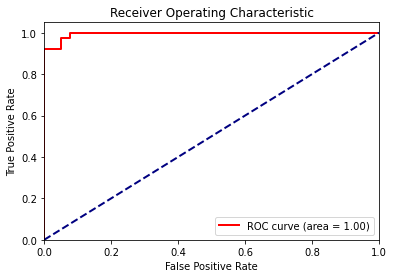

In [12]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
y_actual = []
y_predict = []
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [14]:
import os
from keras.preprocessing import image
from keras import utils as np_utils
for i in os.listdir("Datasets/final_data/test/normal/"):
    img = tf.keras.utils.load_img("Datasets/final_data/test/normal/" + i, target_size = (224,224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    y_predict.append(predict_x[0,0])
    y_actual.append(1)

1/1 [==============================] - 0s 32ms/step


In [15]:
for i in os.listdir("Datasets/final_data/test/covid/"):
    img = tf.keras.utils.load_img("Datasets/final_data/test/covid/" + i, target_size = (224,224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    y_predict.append(predict_x[0,0])
    y_actual.append(0)

1/1 [==============================] - 0s 33ms/step


In [16]:
y_actual = np.array(y_actual)
y_predict = np.array(y_predict)

In [17]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
y_predict

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 2.6046758e-33, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [22]:
y_predict_int = [int(round(x)) for x in y_predict ]

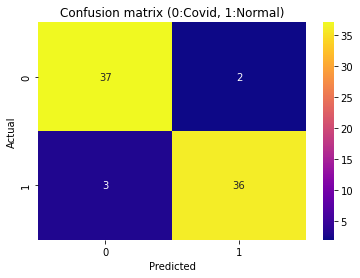

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_actual,y_predict_int)
sns.heatmap(cm, cmap ="plasma",annot=True)
plt.title('Confusion matrix (0:Covid, 1:Normal)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Allow a single X-Ray image to be uploaded and for prediction of Covid-19 test results for our CNN model

In [7]:
import traitlets
from ipywidgets import widgets
from IPython.display import display
from tkinter import Tk, filedialog


class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self):
        super(SelectFilesButton, self).__init__()
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "Select Files"
        self.icon = "square-o"
        self.style.button_color = "red"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.

        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button 
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "green"

In [8]:
my_button = SelectFilesButton()
my_button # This will display the button in the context of Jupyter Notebook

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='red'))

1/1 [==============================] - 0s 89ms/step
Covid-19 Positive


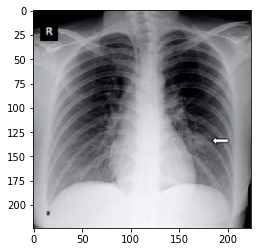

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

img = tf.keras.utils.load_img(my_button.files[0], target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(img/255.)
img = np.expand_dims(img,axis=0)
p=model.predict(img) 
classes_x=np.argmax(p,axis=0)
if p[0,0]==0:
    print("Covid-19 Positive")
else:
    print("Covid-19 Negative")